,CasosDia,Temp. Ins. (C),Umi. Ins. (%),Chuva (mm),CasosDiasTarget
Data,,,,,
2020-03-22,3,26.616667,42.500000,4.453936,4
2020-03-23,3,26.462500,52.833333,4.453936,2
2020-03-24,3,24.812500,64.541667,8.800000,2
2020-03-25,1,22.008333,82.000000,28.800000,2
2020-03-26,0,21.225000,83.666667,0.200000,3
...,...,...,...,...,...
2023-12-27,8,22.787500,80.750000,4.453936,3
2023-12-28,4,24.291667,70.416667,4.453936,6
2023-12-29,7,25.687500,69.083333,4.453936,6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2020-03-22 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CasosDia         1380 non-null   int64  
 1   Temp. Ins. (C)   1380 non-null   float64
 2   Umi. Ins. (%)    1380 non-null   float64
 3   Chuva (mm)       1380 non-null   float64
 4   CasosDiasTarget  1380 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 64.7 KB


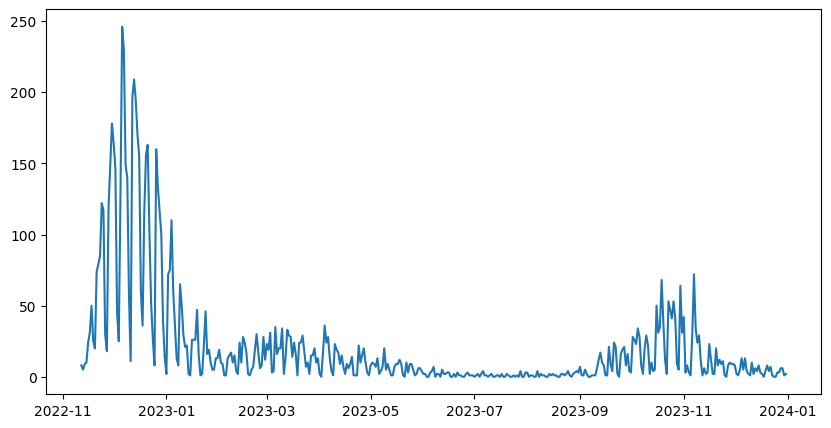

In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]


x_treino = treino.drop(columns='CasosDiasTarget')
y_treino = treino['CasosDiasTarget']

x_teste = teste.drop(columns='CasosDiasTarget')
y_teste = teste['CasosDiasTarget']

# Plotar as previsões em relação aos valores reais

plt.figure(figsize=(10, 5))
plt.plot(y_teste)



# Randon Forest


In [2]:
#RF
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'n_estimators': [10, 20,30,40,50,60,70,80,90,100,200,300,400,500],
    'min_samples_leaf': [2,3,4],
}
melhor_validacao_RF = float('inf')
best_paramsRF = {}





for criterion in param_grid['criterion']:
    for n_estimators in param_grid['n_estimators']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            RF = RandomForestRegressor(
                criterion=criterion,
                n_estimators=n_estimators,
                min_samples_leaf=min_samples_leaf,
            )
            RF.fit(x_treino, y_treino)
            opiniao = RF.predict(x_treino)
            mse_validacao_RF = mean_squared_error(y_treino, opiniao)
            
            if (mse_validacao_RF < melhor_validacao_RF):
                melhor_validacao_RF = mse_validacao_RF
                best_paramsRF = {
                    'criterion': criterion,
                    'n_estimators': n_estimators,
                    'min_samples_leaf': min_samples_leaf,
                }


print(melhor_validacao_RF)
print(mse_validacao_RF)
print(best_paramsRF)

RF = RandomForestRegressor(
                criterion=best_paramsRF['criterion'],
                n_estimators=best_paramsRF['n_estimators'],
                min_samples_leaf=best_paramsRF['min_samples_leaf'],
            )
    
RF.fit(x_treino, y_treino)
opiniao_RF = RF.predict(x_teste)

mae = mean_absolute_error(y_teste, opiniao_RF).round(2)
mse = mean_squared_error(y_teste, opiniao_RF).round(2)
rmse = np.sqrt(mse).round(2)



842.0483275338855
1771.9084390259065
{'criterion': 'squared_error', 'n_estimators': 500, 'min_samples_leaf': 2}


In [3]:
dfRF = pd.DataFrame({
    'criterion':[best_paramsRF['criterion']],
    'n_estimators':[best_paramsRF['n_estimators']],
    'min_samples_leaf':[best_paramsRF['min_samples_leaf']],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")

display(dfRF)
dfRF.to_csv('resultadosModelos/dfRF.csv', sep = ';', index = False, encoding='UTF-8')

O ÚLTIMO VALOR (20) É A MÉDIA !!!


,criterion,n_estimators,min_samples_leaf,MAE,MSE,RMSE
0,squared_error,500,2,13.83,520.05,22.8


In [2]:
import joblib

joblib.dump(opiniao_RF, 'predsSalva/rf.pkl')


NameError: name 'opiniao_RF' is not defined

# CHECKPOINT

In [2]:
import joblib


opiniao_RF = joblib.load('predsSalva/rf.pkl')

DatetimeIndex(['2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Data', length=415, freq=None)


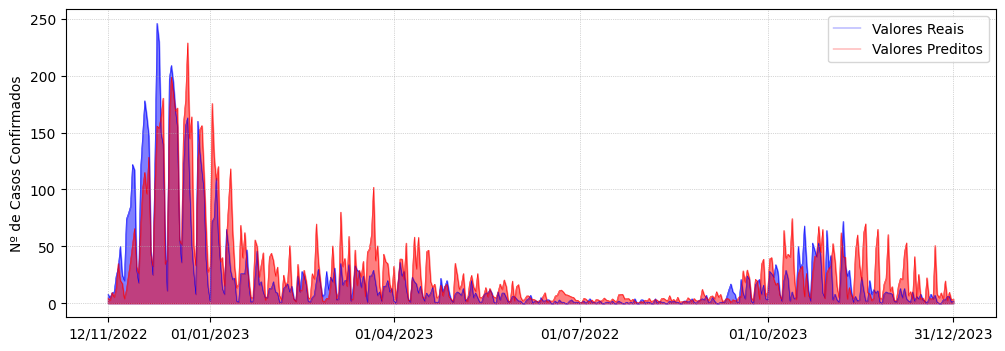

Numero de casos reais:  8737
Numero de casos predito:  11394


In [3]:
len(opiniao_RF)

print(x_teste.index)

serie= pd.Series(opiniao_RF, index=x_teste.index)



stringGraf = 'graficos/4-'+ 'rf' + '.pdf'
plt.figure(figsize=(12, 4))
plt.plot(y_teste, label='Valores Reais', color='blue', linewidth=0.3)
plt.plot(serie, label='Valores Preditos', color='red', linewidth=0.3)
plt.fill_between(x_teste.index, y_teste, color='blue', alpha=0.5)
plt.fill_between(x_teste.index, serie, color='red', alpha=0.5)  # Pinta a área entre as linhas
plt.ylabel('Nº de Casos Confirmados')
plt.legend()

ticks_pos = [df[split:].index[0], '2023-01','2023-04', '2023-07','2023-10', df[split:].index[-1]]
ticks_labels = [
    '12/11/2022',
    '01/01/2023',
    '01/04/2023',
    '01/07/2022',
    '01/10/2023',
    '31/12/2023',
]
plt.grid(linestyle=':', linewidth=.5, alpha=1)
plt.xticks(ticks_pos, labels=ticks_labels)
plt.savefig(stringGraf, dpi=300, bbox_inches="tight")
plt.show()

n_pred = int(opiniao_RF.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)